In [1]:
'''
Ashish Dasu
CS6140 - Machine Learning

Polynomial Regression with Regularization - Airfoil Noise Dataset
'''

'\nAshish Dasu\nCS6140 - Machine Learning\n\nPolynomial Regression with Regularization - Airfoil Noise Dataset\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

In [3]:
def load_airfoil_data():
    '''
    Load training, validation, and test data for airfoil noise prediction.
    Returns separate feature matrices and target vectors for each split.
    '''
    train = pd.read_csv('data/q8-train.csv')
    val = pd.read_csv('data/q8-val.csv')
    test = pd.read_csv('data/q8-test.csv')
    
    target_column = 'Scaled sound pressure level'
    
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]
    
    X_val = val.drop(columns=[target_column])
    y_val = val[target_column]
    
    X_test = test.drop(columns=[target_column])
    y_test = test[target_column]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
def compute_mse(y_true, y_pred):
    '''Calculate mean squared error between predictions and true values.'''
    return np.mean((y_true - y_pred) ** 2)

In [5]:
def train_polynomial_model(X_train, y_train, X_val, y_val, degree):
    '''
    Train polynomial regression model with given degree.
    Steps: normalize features -> polynomial transform -> fit model
    '''
    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    return model, scaler, poly

In [6]:
def evaluate_polynomial_model(model, scaler, poly, X_train, y_train, X_val, y_val):
    '''Evaluate model on train and validation sets.'''
    # Scale and transform
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_train_poly = poly.transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # MSE
    train_mse = compute_mse(y_train, y_train_pred)
    val_mse = compute_mse(y_val, y_val_pred)
    
    return train_mse, val_mse

In [7]:
def run_degree_analysis(X_train, y_train, X_val, y_val):
    '''Train and evaluate models for polynomial degrees 1-5.'''
    print('\n' + '~'*60)
    print('Polynomial Degree Analysis (Part 2a)')
    print('~'*60)
    
    results = []
    
    for degree in range(1, 6):
        model, scaler, poly = train_polynomial_model(X_train, y_train, X_val, y_val, degree)
        train_mse, val_mse = evaluate_polynomial_model(model, scaler, poly, X_train, y_train, X_val, y_val)
        
        results.append({
            'degree': degree,
            'model': model,
            'scaler': scaler,
            'poly': poly,
            'train_mse': train_mse,
            'val_mse': val_mse
        })
        
        print(f'\nDegree {degree}:')
        print(f'  Train MSE: {train_mse:.6f}')
        print(f'  Val MSE:   {val_mse:.6f}')
    
    return results

In [8]:
def train_ridge_model(X_train, y_train, X_val, y_val, degree, alpha):
    '''
    Train Ridge regression model with L2 regularization.
    Same as polynomial model but uses Ridge instead of LinearRegression.
    '''
    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly = poly.transform(X_val_scaled)
    
    # Fit Ridge model
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)
    
    # Predictions and MSE
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    train_mse = compute_mse(y_train, y_train_pred)
    val_mse = compute_mse(y_val, y_val_pred)
    
    return model, scaler, poly, train_mse, val_mse

In [9]:
def analyze_ridge_regularization(X_train, y_train, X_val, y_val):
    '''
    Analyze effect of L2 regularization on polynomial models.
    Tests degrees 3, 4, 5 with different alpha values.
    '''
    print('\n' + '~'*60)
    print('Ridge Regularization Analysis (Part 2b)')
    print('~'*60)
    
    degrees = [3, 4, 5]
    alphas = [0, 0.001, 0.01, 0.1, 1, 10]
    
    results = {}
    
    for degree in degrees:
        results[degree] = []
        print(f'\nDegree {degree}:')
        print('~' * 40)
        
        for alpha in alphas:
            model, scaler, poly, train_mse, val_mse = train_ridge_model(
                X_train, y_train, X_val, y_val, degree, alpha
            )
            
            results[degree].append({
                'alpha': alpha,
                'model': model,
                'scaler': scaler,
                'poly': poly,
                'train_mse': train_mse,
                'val_mse': val_mse
            })
            
            print(f'  Alpha {alpha:6.3f}: Train MSE = {train_mse:.6f}, Val MSE = {val_mse:.6f}')
    
    return results

In [10]:
def plot_regularization_curves(ridge_results):
    '''Plot validation error vs alpha for each degree.'''
    plt.figure(figsize=(10, 6))
    
    alpha_labels = ['0', '0.001', '0.01', '0.1', '1', '10']
    x_positions = range(len(alpha_labels))
    
    for degree in [3, 4, 5]:
        val_mses = [r['val_mse'] for r in ridge_results[degree]]
        plt.plot(x_positions, val_mses, marker='o', label=f'Degree {degree}', linewidth=2)
    
    plt.xticks(list(x_positions), alpha_labels)
    plt.xlabel('Alpha (Regularization Strength)', fontsize=11)
    plt.ylabel('Validation MSE', fontsize=11)
    plt.title('Ridge Regularization: Validation Error vs Alpha', fontsize=13)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [11]:
def select_best_model(degree_results, ridge_results):
    '''
    Select best model based on validation MSE.
    Compares all polynomial models and ridge models.
    '''
    print('\n' + '~'*60)
    print('Model Selection (Part 2c)')
    print('~'*60)
    
    best_mse = float('inf')
    best_model_info = None
    
    # Check polynomial models (no regularization)
    for result in degree_results:
        if result['val_mse'] < best_mse:
            best_mse = result['val_mse']
            best_model_info = {
                'type': 'polynomial',
                'degree': result['degree'],
                'alpha': 0,
                'model': result['model'],
                'scaler': result['scaler'],
                'poly': result['poly'],
                'val_mse': result['val_mse']
            }
    
    # Check ridge models
    for degree in [3, 4, 5]:
        for result in ridge_results[degree]:
            if result['val_mse'] < best_mse:
                best_mse = result['val_mse']
                best_model_info = {
                    'type': 'ridge',
                    'degree': degree,
                    'alpha': result['alpha'],
                    'model': result['model'],
                    'scaler': result['scaler'],
                    'poly': result['poly'],
                    'val_mse': result['val_mse']
                }
    
    print(f'\nBest Model:')
    print(f'  Type: {best_model_info["type"]}')
    print(f'  Degree: {best_model_info["degree"]}')
    print(f'  Alpha: {best_model_info["alpha"]}')
    print(f'  Validation MSE: {best_model_info["val_mse"]:.6f}')
    
    return best_model_info

In [12]:
def evaluate_on_test(best_model_info, X_test, y_test):
    '''Evaluate best model on test set.'''
    model = best_model_info['model']
    scaler = best_model_info['scaler']
    poly = best_model_info['poly']
    
    # Transform test data
    X_test_scaled = scaler.transform(X_test)
    X_test_poly = poly.transform(X_test_scaled)
    
    # Predict
    y_test_pred = model.predict(X_test_poly)
    test_mse = compute_mse(y_test, y_test_pred)
    
    print(f'\n' + '~'*60)
    print('Test Set Performance')
    print('~'*60)
    print(f'Test MSE: {test_mse:.6f}')
    
    return test_mse

Training samples: 1021
Validation samples: 256
Testing samples: 226

Features: ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Polynomial Degree Analysis (Part 2a)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Degree 1:
  Train MSE: 21.995337
  Val MSE:   29.208962

Degree 2:
  Train MSE: 16.115029
  Val MSE:   21.869924

Degree 3:
  Train MSE: 10.882458
  Val MSE:   15.108119

Degree 4:
  Train MSE: 6.356774
  Val MSE:   11.854986

Degree 5:
  Train MSE: 4.069527
  Val MSE:   25.863184

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ridge Regularization Analysis (Part 2b)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Degree 3:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  Alpha  0.000: Train MSE = 10.882458, Val MSE = 15.108119
  Alpha  0.001: Train MSE = 10.882460, Val MSE = 15.107960
  Alpha  0.010: Train MSE = 10.88

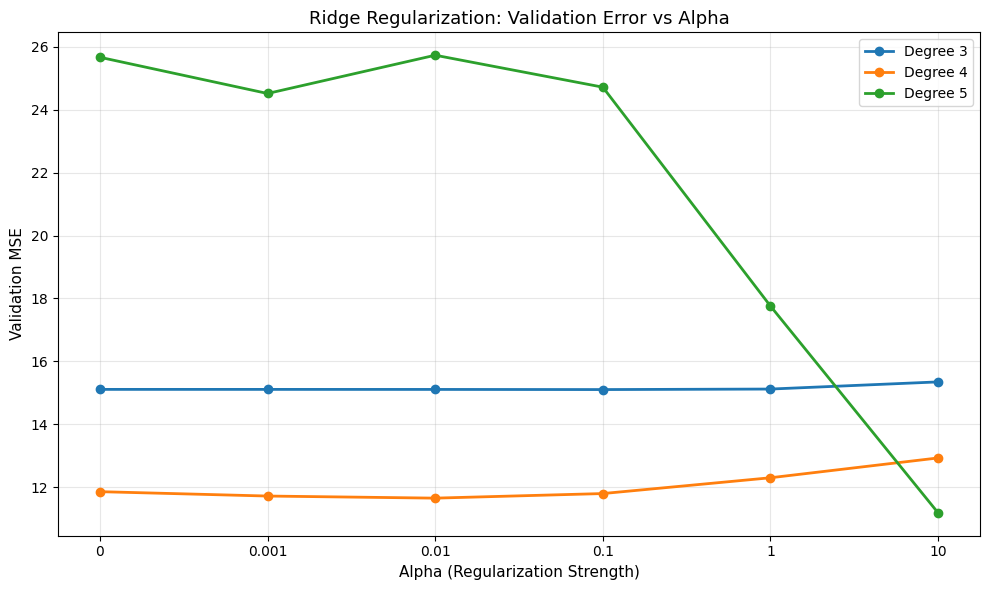


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model Selection (Part 2c)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Best Model:
  Type: ridge
  Degree: 5
  Alpha: 10
  Validation MSE: 11.181247

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Set Performance
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test MSE: 6.972583


In [13]:
if __name__ == '__main__':
    X_train, y_train, X_val, y_val, X_test, y_test = load_airfoil_data()
    
    print(f'Training samples: {len(X_train)}')
    print(f'Validation samples: {len(X_val)}')
    print(f'Testing samples: {len(X_test)}')
    print(f'\nFeatures: {list(X_train.columns)}')
    
    # Part 2(a): Polynomial degree analysis
    degree_results = run_degree_analysis(X_train, y_train, X_val, y_val)
    
    # Part 2(b): Ridge regularization analysis
    ridge_results = analyze_ridge_regularization(X_train, y_train, X_val, y_val)
    plot_regularization_curves(ridge_results)
    
    # Part 2(c): Select best model and evaluate on test set
    best_model = select_best_model(degree_results, ridge_results)
    test_mse = evaluate_on_test(best_model, X_test, y_test)